# Linear Regression using Gradient Descent

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')

In [2]:
salary_data=pd.read_csv('salary.csv')

In [3]:
salary_data.head()

,YearsExperience,Salary,age,company_change,type
0,1.1,39343,21,1,junior
1,1.3,46205,31,0,middle
2,1.5,37731,29,1,middle
3,2.0,43525,30,1,middle
4,2.2,39891,27,1,middle


In [4]:
x=np.array(salary_data['YearsExperience'])
y=np.array(salary_data['Salary'])
l=len(x)

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=6)
lx=len(x_train)

Gradient Descent formula

$ \displaystyle h_{\theta}(x)=\theta_0+\theta_1x \mbox{ and } J(\theta_0,\theta_1)=\frac{1}{2m}\sum_{i=1}^{m} \left(h_{\theta}(x^{(i)})-y^{(i)}\right)^2 $

$ \displaystyle\theta_j:=\theta_j-\alpha \frac{\partial}{\partial\theta_j}\left(\frac{1}{2m}\sum_{i=1}^{m} \left(\theta_0+\theta_1x^{(i)}-y^{(i)}\right)^2 \right) $

$ \displaystyle \frac{\partial}{\partial\theta_0}\left(\frac{1}{2m}\sum_{i=1}^{m} \left(\theta_0+\theta_1x^{(i)}-y^{(i)}\right)^2 \right) = \frac{1}{m}\sum_{i=1}^{m} \left(\theta_0+\theta_1x^{(i)}-y^{(i)}\right) = \frac{1}{m}\sum_{i=1}^{m} \left(h_{\theta}(x^{(i)})-y^{(i)}\right) $

$ \displaystyle \frac{\partial}{\partial\theta_1}\left(\frac{1}{2m}\sum_{i=1}^{m} \left(\theta_0+\theta_1x^{(i)}-y^{(i)}\right)^2 \right) = \frac{1}{m}\sum_{i=1}^{m} \left(\theta_0+\theta_1x^{(i)}-y^{(i)}\right).x^{(i)} = \frac{1}{m}\sum_{i=1}^{m} \left(h_{\theta}(x^{(i)})-y^{(i)}\right).x^{(i)} $

$ \displaystyle\mbox{ repeat until convergence }\left\{\theta_j:=\theta_j-\alpha\frac{\partial}{\partial\theta_j}f(\theta_0,\theta_1)\mbox{ for j=0,1} \right\} $

In [7]:
m=0.1
c=0.5
alpha=0.01
m_values=[]
c_values=[]
for i in range(4000):
    slope=0
    intercept=0
    for j in range(l):
        intercept=intercept+((m*x[j]+c)-y[j])
        slope=slope+((m*x[j]+c)-y[j])*x[j]
    c=c-((alpha*intercept)/l)
    m=m-((alpha*slope)/l)
    c_values.append(c)
    m_values.append(m)

In [8]:
print(f"slope is {m}")
print(f"intercept is {c}")

slope is 9450.704878460741
intercept is 25787.196304094174


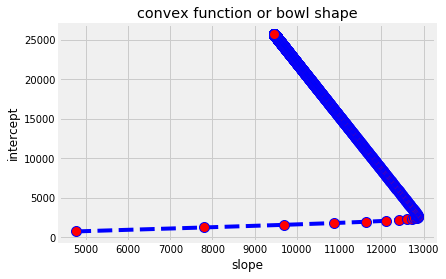

In [9]:
plt.plot(m_values[:],c_values[:],marker='o',
         color='blue',markerfacecolor='red',
         markersize=10,linestyle='dashed')
plt.xlabel("slope")
plt.ylabel("intercept")
plt.title("convex function or bowl shape")
plt.show()

In [10]:
y_pred=[]
for i in x_test:
    v=m*i+c
    y_pred.append(v)
print(y_pred)

[36182.97167040099, 123129.45655223982, 116513.96313731729, 54139.3109394764, 75875.9321599361, 82491.42557485863, 56029.45191516855, 53194.24045163032]


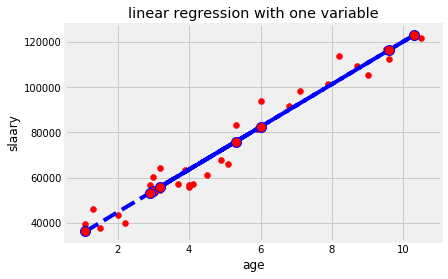

In [11]:
plt.plot(x_test,y_pred,marker='o',
         color='blue',markerfacecolor='red',
         markersize=10,linestyle='dashed')
plt.scatter(x,y,marker='o',color='red')
plt.xlabel("age")
plt.ylabel("slaary")
plt.title("linear regression with one variable")
plt.show()

cost function

$ \displaystyle J(\theta_0,\theta_1)=\frac{1}{2m}\sum_{i=1}^{m} \left(h_{\theta}(x^{(i)})-y^{(i)}\right)^2 $

In [12]:
def cost_function():
    t=0
    for i in range(len(y_pred)):
        t=t+(y_pred[i]-y_test[i])**2
    error=t/(2*len(y_pred))
    print(f"error is {error}")
cost_function()

error is 16199196.737432456
